In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import talib
import  pynance as pn

In [4]:
plt.style.use("seaborn-v0_8")

In [5]:
df = pd.read_csv("../data/AAPL.csv")
df.columns = [c.strip().capitalize() for c in df.columns]

In [6]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date").set_index("Date")

df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200
2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400
2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400
2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800
2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800


In [7]:
# Simple Moving Average
df["SMA_20"] = talib.SMA(df["Close"], timeperiod=20)

# RSI
df["RSI_14"] = talib.RSI(df["Close"], timeperiod=14)

# MACD
macd, signal, hist = talib.MACD(df["Close"], 12, 26, 9)
df["MACD"] = macd
df["MACD_Signal"] = signal
df["MACD_Hist"] = hist


In [8]:
def sharpe_ratio(returns, rf=0.0):
    """
    Calculate annualized Sharpe Ratio.
    """
    daily_return = returns.mean()
    daily_vol = returns.std()
    sharpe = (daily_return - rf) / daily_vol
    return sharpe * np.sqrt(252)

df["Returns"] = df["Close"].pct_change()
sharpe = sharpe_ratio(df["Returns"].dropna())
sharpe


np.float64(1.1362496277716159)

In [9]:
def max_drawdown(series):
    cumulative = series / series.iloc[0]
    running_max = cumulative.cummax()
    drawdown = (cumulative - running_max) / running_max
    return drawdown.min()

mdd = max_drawdown(df["Close"])
mdd


np.float64(-0.43797147354228283)

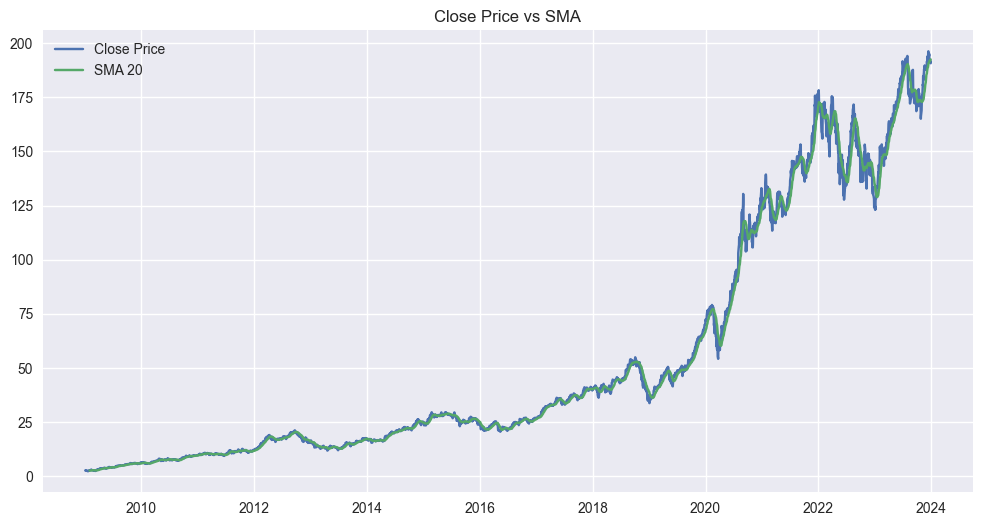

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Close"], label="Close Price")
plt.plot(df.index, df["SMA_20"], label="SMA 20")
plt.title("Close Price vs SMA")
plt.legend()
plt.show()


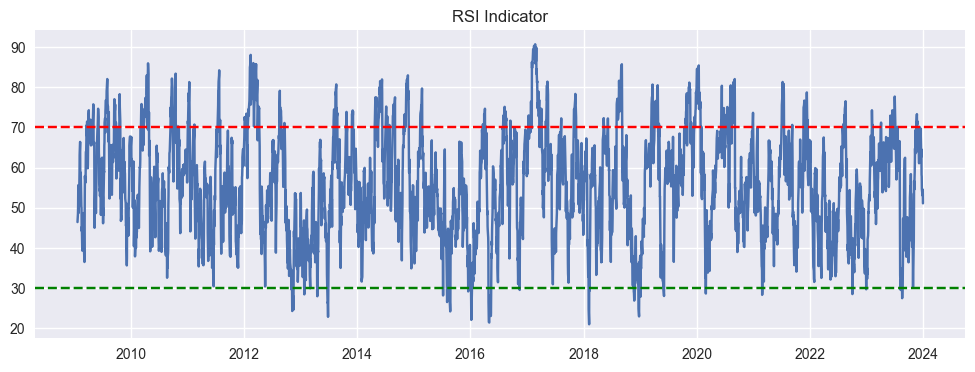

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df["RSI_14"], label="RSI 14")
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title("RSI Indicator")
plt.show()


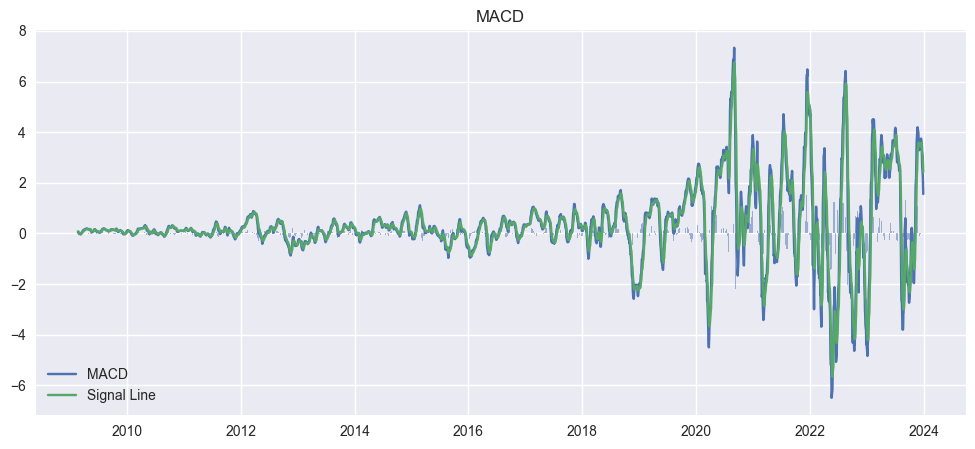

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df["MACD"], label="MACD")
plt.plot(df.index, df["MACD_Signal"], label="Signal Line")
plt.bar(df.index, df["MACD_Hist"], alpha=0.5)
plt.title("MACD")
plt.legend()
plt.show()


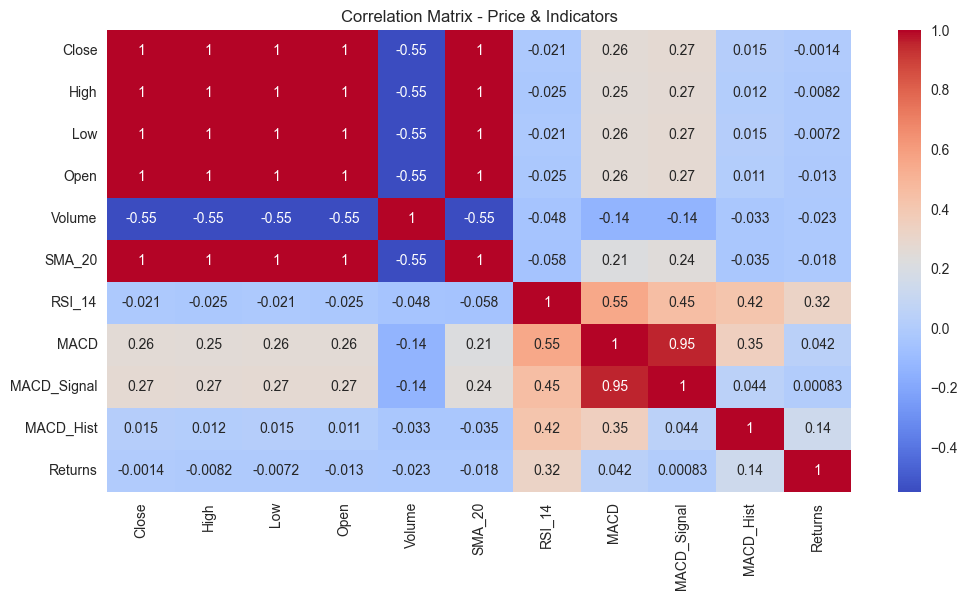

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix - Price & Indicators")
plt.show()


In [15]:
print("===== Financial Metrics =====")
print(f"Sharpe Ratio: {sharpe:.3f}")
print(f"Max Drawdown: {mdd:.3f}")
print("=============================")


===== Financial Metrics =====
Sharpe Ratio: 1.136
Max Drawdown: -0.438
